In [68]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import seaborn as sns

def km(data_set):
    '''
    :param data_set: Dataframe containing predictor variables of training set with normalized values
    :return: dictionary containing clustering model's parameters and average silhouette scores
    '''
    ss_dict = {}
    n_cluster = [2, 3]
    print '='*100
    print 'Clustering Analysis: Kmeans'
    for n in n_cluster:
        model = KMeans(n_clusters=n)
        fit = model.fit(data_set)
        labels = pd.Series(model.labels_)
        a_cluster_labels = model.fit_predict(data_set)
        silhouette_avg = silhouette_score(data_set, a_cluster_labels, random_state=0)
        print "\n\t", "Model: Kmeans", "\n\t", "For n_clusters =", n, "\n\t", "The average silhouette_score is :", silhouette_avg
        ss_dict[(n)] = [(n, silhouette_avg)]
    return ss_dict

In [86]:
from IPython.display import IFrame, HTML
from IPython.core.display import display

display(IFrame("http://demographics.coopercenter.org/DotMap/index.html", '800px', '600px'))

In [69]:
def agglomerative(data_set):
    '''
    :param data_set: Dataframe containing predictor variables of training set with normalized values
    :return: dictionary containing clustering model's parameters and average silhouette scores
    '''
    ss_dict = {}
    n_cluster = [2, 3]
    e_links = ['ward', 'complete', 'average']  # to try manhattan, take out ward
    print '='*100
    print 'Clustering Analysis: Agglomerative'
    for elem in e_links:
        for n in n_cluster:
            model = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage=elem)  # manhattan
            #model = KMeans(n_clusters=k)
            fit = model.fit(data_set)
            labels = pd.Series(model.labels_)
            a_cluster_labels = model.fit_predict(data_set)
            silhouette_avg = silhouette_score(data_set, a_cluster_labels, random_state=0)
            # sss = silhouette_score(data_set, a_cluster_labels, random_state=0)
            # print sss, '!!!!\n'
            print "\n\t", "Model: Agglomerative", "\n\t", 'distance metric:', model.affinity, "\n\t", \
                'linkage:', model.linkage, "\n\t", \
                "For n_clusters =", n, "\n\t", "The average silhouette_score is :", silhouette_avg
            ss_dict[(elem, n)] = [(n, model.affinity, model.linkage, silhouette_avg)]
    return ss_dict

In [70]:
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, recall_score, confusion_matrix, \
    classification_report, silhouette_samples, silhouette_score

In [88]:
df = pd.read_csv('/Users/desert/desert_workspace/final_data.csv')
df=df.drop('Unnamed: 0', axis=1)
df.head()
data = df.drop('County', axis=1)


percent_food_desert


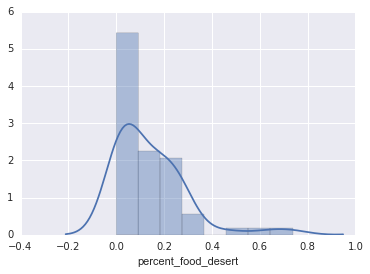

pop2010_in_des


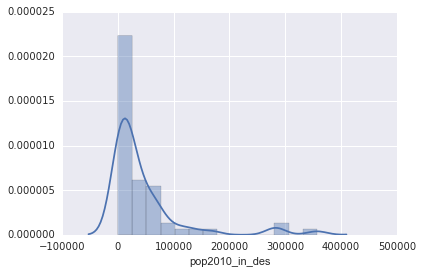

num_tracts


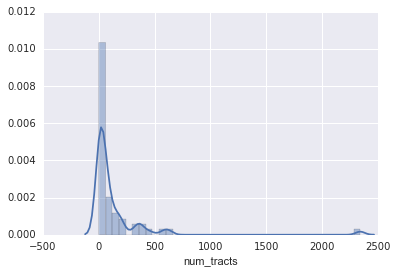

n_food_des


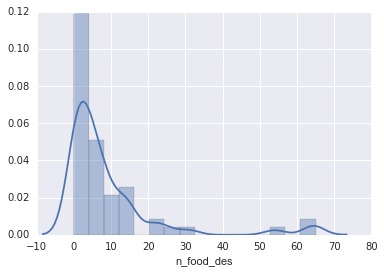

n_urban


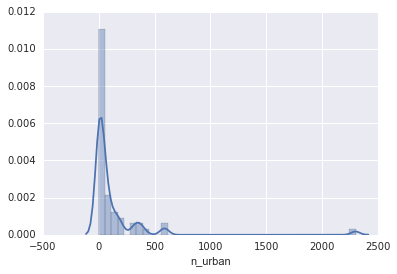

n_rural


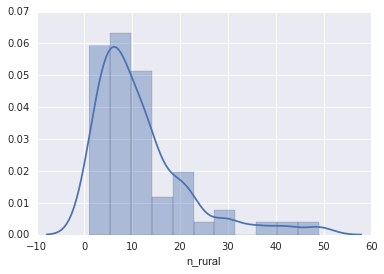

urban_des


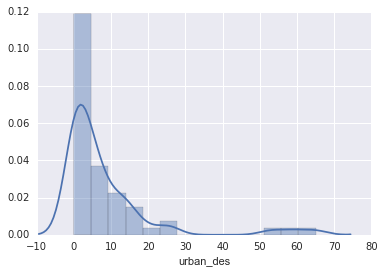

rural_des


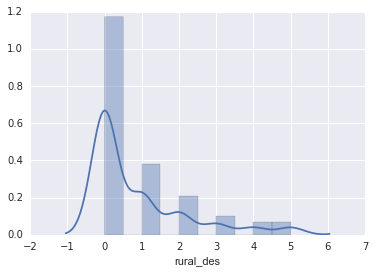

Rural


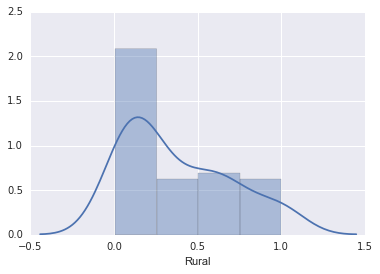

Urban


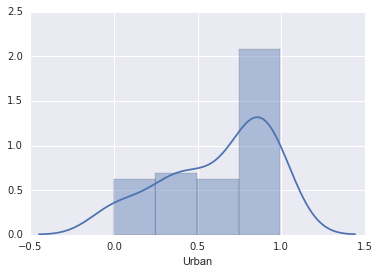

LILATracts_1And10


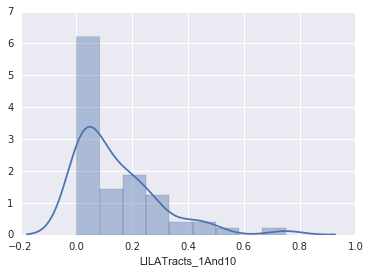

high_food_des_prev


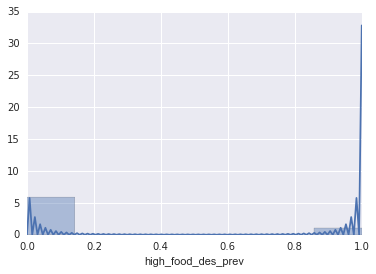

cnty_obesity_pct


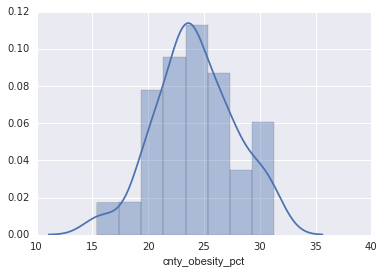

cnty_obesity_pct_adj


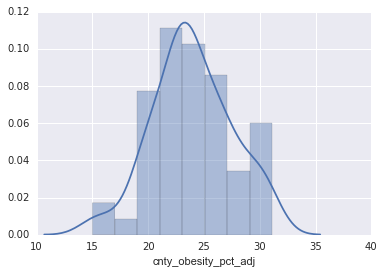

cnty_dm_pct


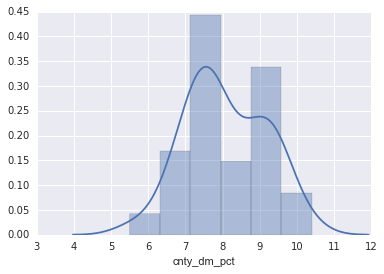

cnty_dm_pct_adj


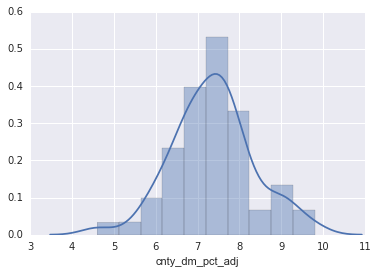

cnty_inactive_pct


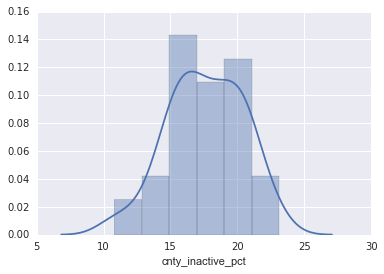

cnty_inactive_pct_adj


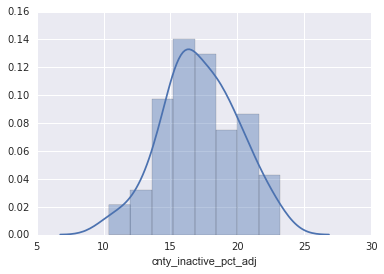

POP2010


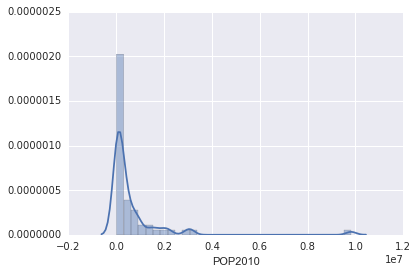

OHU2010


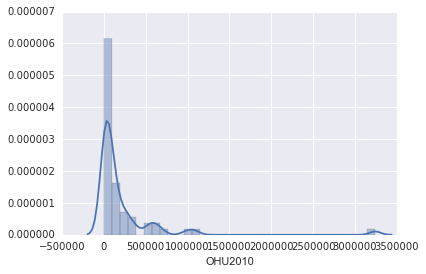

NUMGQTRS


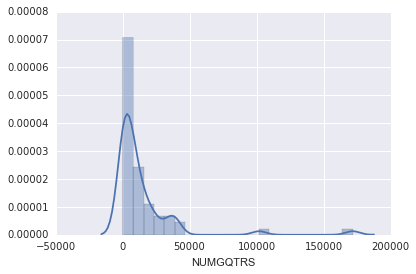

HUNVFlag


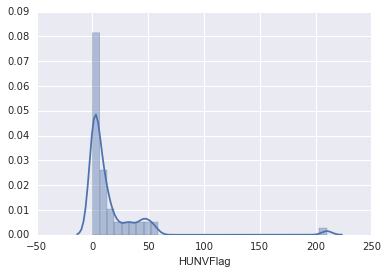

Adolescent_births


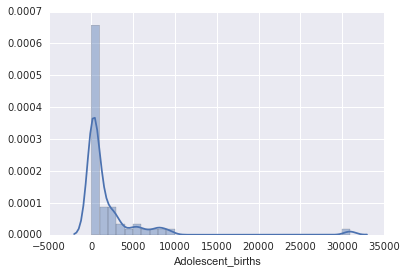

ABR


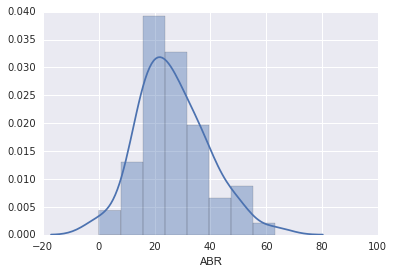

p_hs_edatt


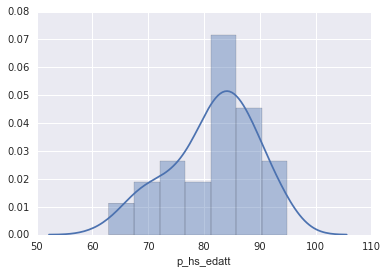

PC_PHYS_R


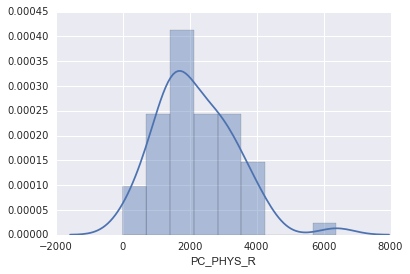

DENTIST_R


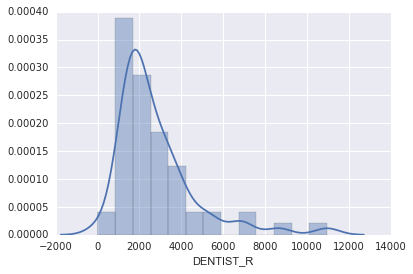

PSYCH_R


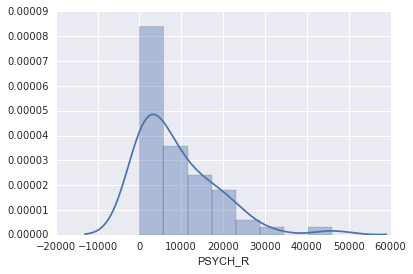

PCT_HSPNC


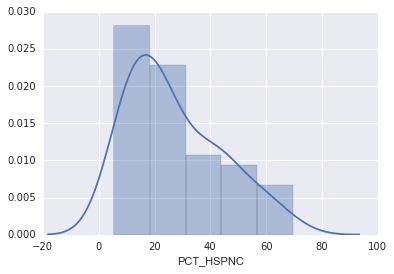

PCT_WHITE


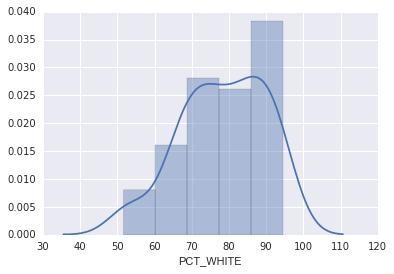

PCT_BLACK


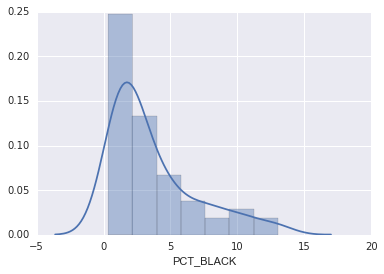

PCT_ASIAN


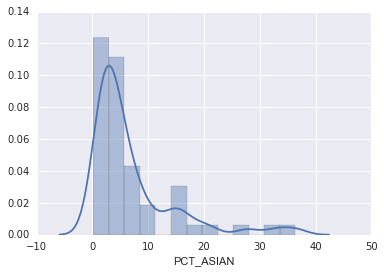

PCT_AMIND_ESK


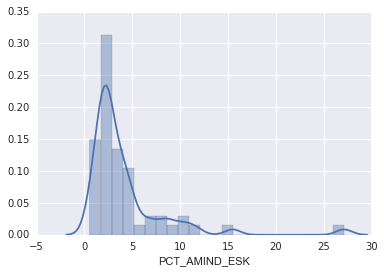

PCT_ISLANDER


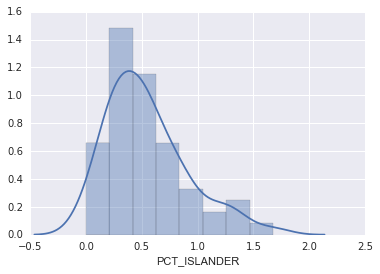

PCT_MULTI


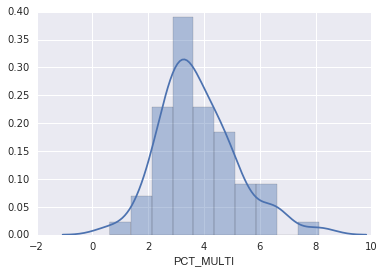

PCT_OTHER


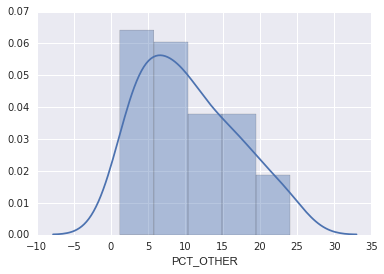

PCT_65OVER


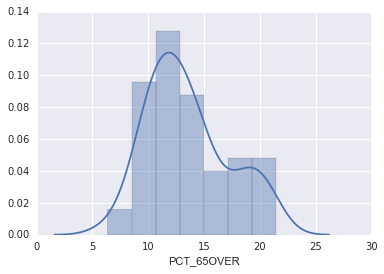

PCT_18_64


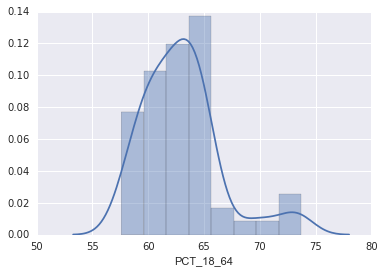

PCT_UNDR18


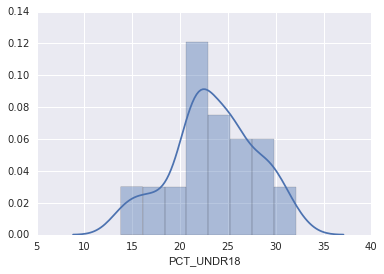

PCT_UNDER5


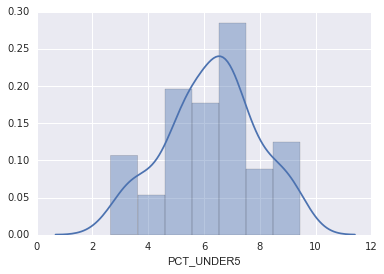

In [91]:
#km(data)
data = data[data.columns.tolist()[:40]]
#km(data[data.columns.tolist()[:40]])
#a = pd.scatter_matrix(data,alpha=0.05,figsize=(10,10), diagonal='hist')
for col in data.columns.tolist():
    print col
    sns.distplot(data[col])
    plt.show()


In [161]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

# linear_regression = smf.ols(formula='percent_food_desert ~ unemployment_rate', data=df)
# fitted_model = linear_regression.fit()
x = data[data.columns.tolist()[2:]]
y = data[data.columns.tolist()[1]]
Xc = sm.add_constant(x)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()
#help(linear_regression)
# print('Parameters: ', fitted_model.params)
# print('R2: ', fitted_model.rsquared)
x= df[['n_food_des',  'OHU2010']]
Xc = sm.add_constant(x)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()
#data.columns.tolist()[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pop2010_in_des   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2255.
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           1.68e-53
Time:                        22:11:40   Log-Likelihood:                -601.98
No. Observations:                  58   AIC:                             1210.
Df Residuals:                      55   BIC:                             1216.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1690.1206   1263.505     -1.338      0.187     -4222.240   841.999
n_food_des  5636.4786    111.249     50.666      0.000      5413.531  5859.426
OHU2010       -0.0233      0.003     -7.024      0.000        -0.030    -0.017
==============================================================================
Omnibus:                        3.509   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                2.668
Skew:                           0.335   Prob(JB):                        0.263
Kurtosis:                       3.809   Cond. No.                     6.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

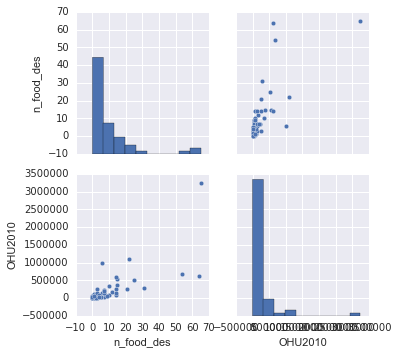

In [162]:
sns.pairplot(x)

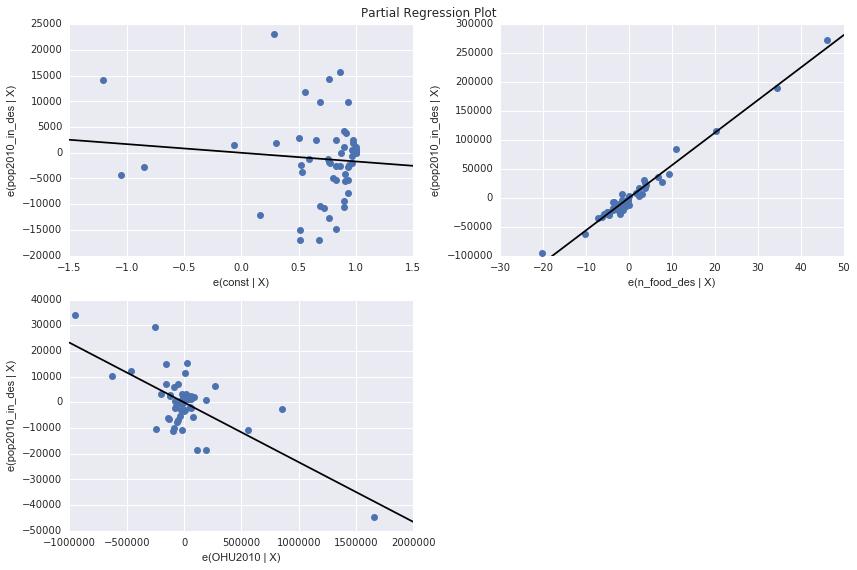

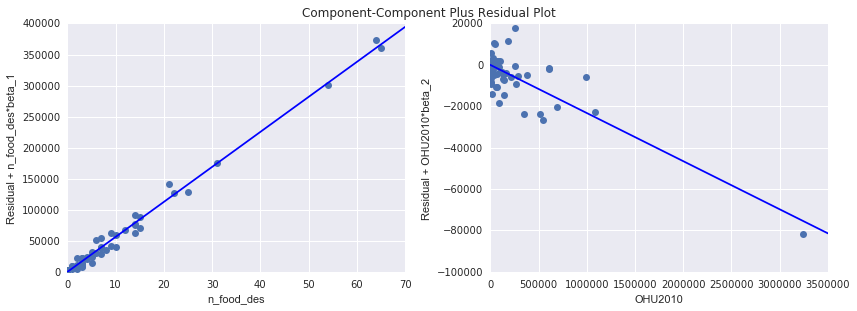

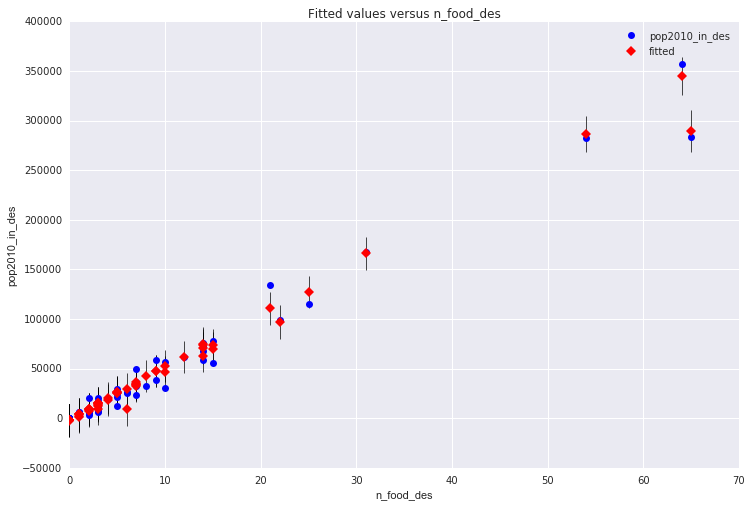

In [166]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(fitted_model, fig=fig)
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(fitted_model, fig=fig)
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(fitted_model, "n_food_des", ax=ax)

In [135]:
print('Parameters: ', fitted_model.params)
print('Standard errors: ', fitted_model.bse)
print('Predicted values: ', fitted_model.predict())

('Parameters: ', const                    655201.195022
num_tracts                 -130.024274
n_food_des                 3330.723313
n_urban                     -68.824725
n_rural                     -61.200235
urban_des                  1954.208188
rural_des                  1376.515578
Rural                    330193.758336
Urban                    325007.436700
LILATracts_1And10        -12241.102933
high_food_des_prev         1524.658806
cnty_obesity_pct           9933.686855
cnty_obesity_pct_adj      -8875.777996
cnty_dm_pct                 967.191141
cnty_dm_pct_adj           -5541.765505
cnty_inactive_pct         -2849.585114
cnty_inactive_pct_adj      2355.622580
POP2010                       0.115567
OHU2010                      -0.256954
NUMGQTRS                      0.185759
HUNVFlag                    262.879593
Adolescent_births             0.654666
ABR                          38.151081
p_hs_edatt                  179.730751
PC_PHYS_R                     0.470160
DENTIST_

In [137]:
norm_x = x.values
for i, name in enumerate(x):
    if name == "const":
        continue
    norm_x[:,i] = x[name]/np.linalg.norm(x[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [139]:
norm_xtx
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

nan


In [144]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(fitted_model.resid, fitted_model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 29.563481927624807),
 ('p-value', 0.83454255271002664),
 ('f-value', 0.65348225902682022),
 ('f p-value', 0.87266104604272288)]

In [146]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(fitted_model)
lzip(name, test)

LinAlgError: Singular matrix

In [132]:
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict()
betas
fitted_model.params
fitted_model.summary()
betas
fitted_values
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# standardization = StandardScaler()
# Stand_coef_linear_reg = make_pipeline(standardization,linear_regression)
# linear_regression.fit(x,y)
# for coef, var in sorted(zip(map(abs,linear_regression.coef_), \
#            x.columns[:-1]), reverse=True):
#            print ("%6.3f %s" % (coef,var))


array([  5.94000694e+04,   2.21841681e+03,   2.85274238e+03,
         6.26010195e+04,  -5.45391023e+03,   7.11148515e+03,
         7.21059444e+04,   7.87539050e+03,   1.12534525e+04,
         1.67101635e+05,   2.15014901e+04,   3.23243307e+04,
         5.44598984e+04,   1.63735651e+03,   1.24092152e+05,
         3.60439610e+04,   2.33875954e+02,   9.25790480e+03,
         2.82298102e+05,   1.03765044e+04,   8.85067492e+03,
        -2.13142034e+03,   2.11092734e+04,   6.03456154e+04,
         6.56644467e+03,  -9.78960508e+02,   3.55558913e+04,
         2.11825379e+03,   1.52825208e+04,   2.88160662e+04,
         2.39127143e+04,   3.83258277e+03,   2.82252564e+05,
         1.16769589e+05,   8.71067843e+03,   3.58169600e+05,
         1.01612536e+05,   3.21438137e+04,   3.85226147e+04,
         9.56608528e+03,   8.32046874e+03,   1.42770485e+04,
         7.21257304e+04,   2.00182049e+04,   4.02117412e+04,
         3.67401889e+03,   2.08084907e+04,   2.12879685e+04,
         3.86965072e+04,

In [75]:
def normalize(X_train, x_cols):
    '''
    :param X_train: Predictor dataframe produced by split_data() (X_train)
    :param x_cols: the column names of X_train
    :return: A normalized version of X_train. Columns are scaled from 0 to 1
    '''
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm)
    X_train_norm.columns = x_cols
    return X_train_norm


norm_X_train = normalize(data, data.columns) 

In [76]:
km(norm_X_train)

Clustering Analysis: Kmeans

	Model: Kmeans 
	For n_clusters = 2 
	The average silhouette_score is : 0.201304150572

	Model: Kmeans 
	For n_clusters = 3 
	The average silhouette_score is : 0.188537678045


{2: [(2, 0.2013041505716959)], 3: [(3, 0.18853767804507801)]}

In [77]:

def add_clust_labels(norm_X_train):
    '''
    :param norm_X_train: Dataframe containing predictor variables of training set with normalized values
    :return: None, generated plot of clusters saved as 'cluster_assessment.png'
    '''
    test = norm_X_train.copy()
    ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage='average')
    fit = ac.fit(test)
    labels = pd.Series(ac.labels_)
    test['clust'] = labels
    sns.pairplot(data=test, hue='clust', diag_kind='kde')

In [78]:
def ck_kmeans(data):
    s = []
    for n_clusters in range(2,30):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        s.append(silhouette_score(data, labels, metric='euclidean'))
    plt.plot(s)
    plt.ylabel("Silouette")
    plt.xlabel("k")
    plt.title("Silouette for K-means clusters")
    sns.despine()
    plt.show()


def ck_agg(data):
    s = []
    for n_clusters in range(2,30):
        model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
        model.fit(data)
        labels = model.labels_
        s.append(silhouette_score(data, labels, metric='euclidean'))
    plt.plot(s)
    plt.ylabel("Silouette")
    plt.xlabel("k")
    plt.title("Silouette for Agglomerative clusters")
    sns.despine()
    plt.show()


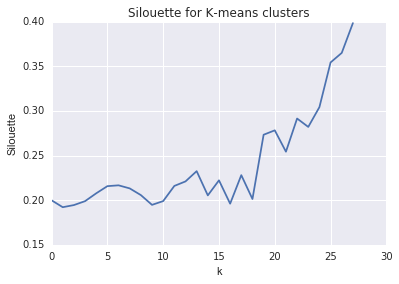

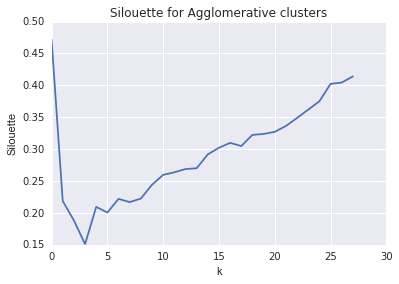

In [81]:
ck_kmeans(norm_X_train)
ck_agg(norm_X_train)

In [82]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(norm_X_train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [83]:
data = data[data.columns.tolist()[:7]]
data['clust'] = labels
data.head()

,percent_food_desert,pop2010_in_des,num_tracts,n_food_des,n_urban,n_rural,urban_des,clust
0,0.037134,56082.0,360.0,15.0,354.0,6.0,15.0,1
1,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.000000,0.0,9.0,0.0,0.0,9.0,0.0,0
3,0.268086,58979.0,51.0,14.0,38.0,13.0,13.0,0
4,0.000000,0.0,10.0,0.0,2.0,8.0,0.0,0


In [84]:
data.groupby('clust').describe()

n_food_des    n_rural      n_urban   num_tracts  \
clust                                                          
0     count   29.000000  29.000000    29.000000    29.000000   
      mean     3.241379   8.965517    22.448276    31.413793   
      std      3.602134   5.984998    39.501886    40.779474   
      min      0.000000   1.000000     0.000000     1.000000   
      25%      0.000000   5.000000     1.000000     7.000000   
      50%      2.000000   7.000000     4.000000    14.000000   
      75%      5.000000  12.000000    31.000000    48.000000   
      max     14.000000  23.000000   194.000000   196.000000   
1     count   29.000000  29.000000    29.000000    29.000000   
      mean    15.275862  14.551724   231.413793   245.965517   
      std     17.580217  12.205345   432.592890   439.460910   
      min      1.000000   3.000000     2.000000     5.000000   
      25%      4.000000   6.000000    23.000000    31.000000   
      50%      9.000000  12.000000    89.000000    96.000000   
      75%     15.000000  19.000000   304.000000   317.000000   
      max     65.000000  49.000000  2301.000000  2343.000000   

             percent_food_desert  pop2010_in_des  urban_des  
clust                                                        
0     count            29.000000       29.000000  29.000000  
      mean              0.137509    13418.068966   2.413793  
      std               0.156111    16189.239685   3.469430  
      min               0.000000        0.000000   0.000000  
      25%               0.000000        0.000000   0.000000  
      50%               0.076209     6168.000000   1.000000  
      75%               0.237917    21705.000000   3.000000  
      max               0.636795    58979.000000  13.000000  
1     count            29.000000       29.000000  29.000000  
      mean              0.144615    77483.241379  14.379310  
      std               0.146289    89640.621937  16.935621  
      min               0.008702     5922.000000   1.000000  
      25%               0.042588    20729.000000   4.000000  
      50%               0.120371    56082.000000   7.000000  
      75%               0.180172    77910.000000  15.000000  
      max               0.737110   356923.000000  65.000000

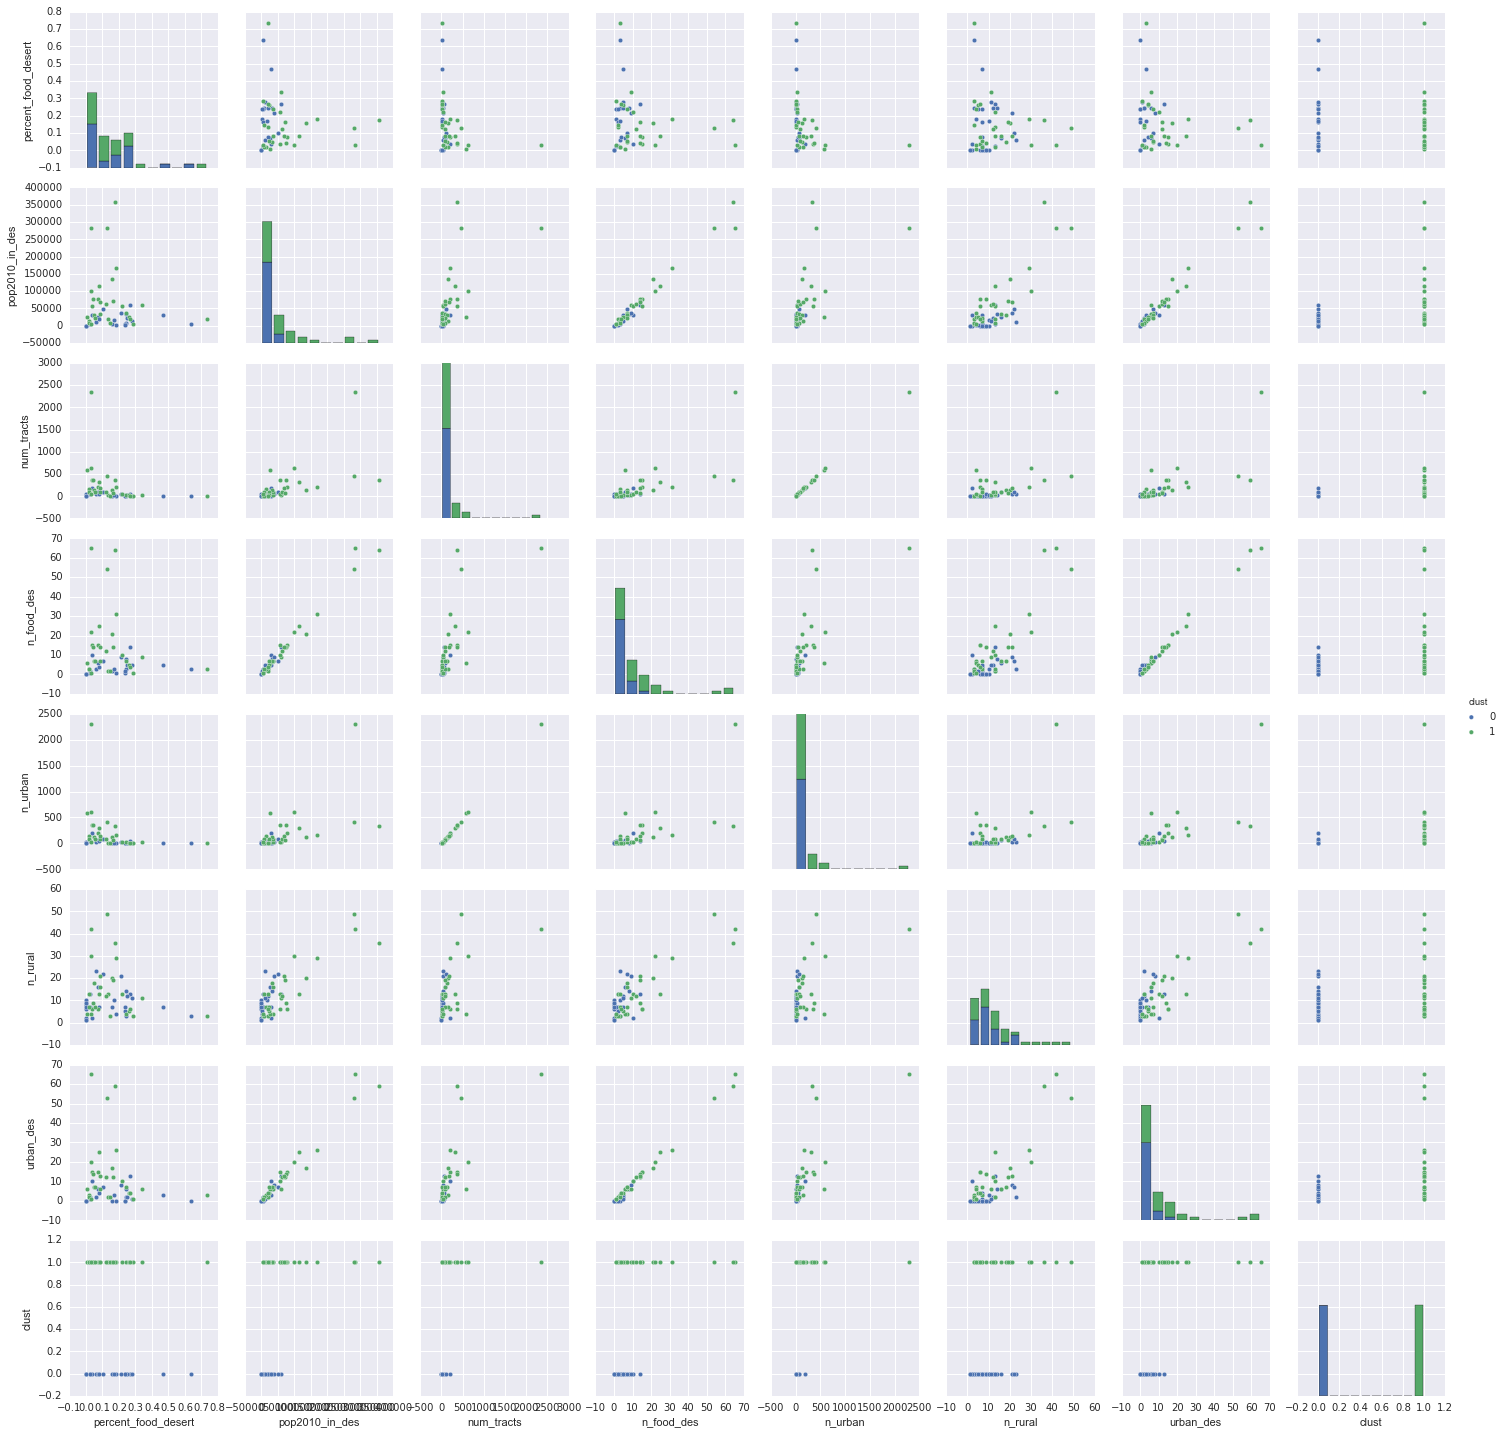

In [85]:
sns.pairplot(data,hue='clust')

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

theta = 3
x = np.random.poisson(theta, size=1000)
x.mean(), x.var()

(3.0579999999999998, 3.1766359999999998)

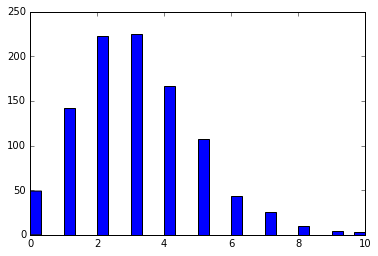

In [2]:
_ = plt.hist(x, bins=30)

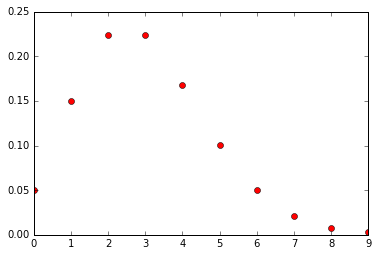

In [3]:
y = stats.poisson.pmf(range(10), theta)
plt.plot(y, 'ro')

In [4]:
mu, sig = 10, 3

x = np.random.normal(mu, sig, 1000)
x.mean(), x.std()

(10.174384283246866, 3.0041243214269926)

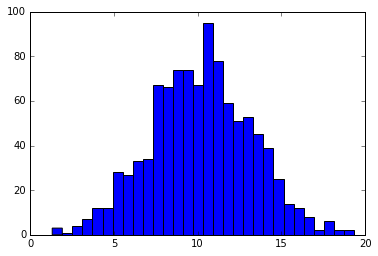

In [5]:
_ = plt.hist(x, bins=30)

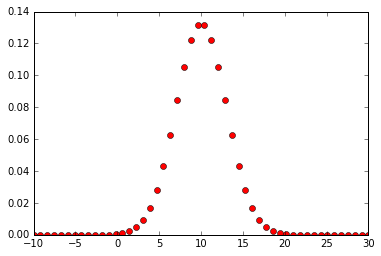

In [6]:
xvals = np.linspace(-10, 30)
y = stats.norm.pdf(xvals, mu, sig)
plt.plot(xvals, y, 'ro')

In [7]:
from IPython.display import HTML
HTML('<iframe src=http://pymc-devs.github.io/pymc/distributions.html width=900 height=350></iframe>')

In [8]:
from scipy.misc import comb

pbinom = lambda y, n, p: comb(n, y) * p**y * (1-p)**(n-y)


This function returns the probability of observing y events from n trials, where events occur independently with probability p.

In [9]:

pbinom(3, 10, 0.5) # 3 events out of 10 with a prob of 0.5

0.1171875

In [10]:
pbinom(1, 25, 0.5)

7.4505805969238281e-07

Probability distribution - changing y values

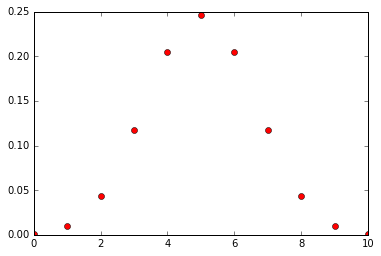

In [11]:
yvals = range(10+1) # 0 to N
plt.plot(yvals, [pbinom(y, 10, 0.5) for y in yvals], 'ro')

What about the likelihood function?
The likelihood function is the exact same form as the sampling distribution, except that we are now interested in varying the parameter for a given dataset (aka theta).

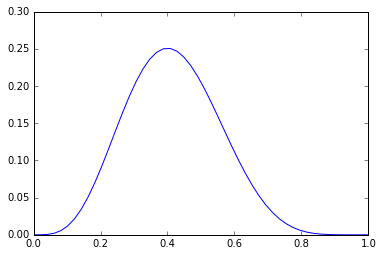

In [12]:
pvals = np.linspace(0, 1) # 0 to 1
y = 4
plt.plot(pvals, [pbinom(y, 10, p) for p in pvals])